In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [3]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
df = df.rename(columns=a_renomear)

In [5]:
trocar = {
    'yes': 1,
    'no': 0
}
df.vendido = df.vendido.map(trocar)

In [6]:
from datetime import datetime

ano_atual = datetime.today().year
df['idade_do_modelo'] = ano_atual - df.ano_do_modelo

In [7]:
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [8]:
df['km_por_ano'] = df.milhas_por_ano * 1.60934

In [9]:
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [10]:
df = df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [11]:
x = df[['preco', 'idade_do_modelo', 'km_por_ano']]
y = df['vendido']

## Valor base usando DummyClassifier

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(5)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y)

In [14]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
predict_dummy = dummy.predict(x_test)

accuracy_dummy = accuracy_score(y_test, predict_dummy) 
print(accuracy_dummy)

0.58


In [15]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


model = SVC()
model.fit(x_train, y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test, predict)
print(accuracy)

0.7748


## Usando DecisionTree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test, predict)
print(accuracy)

0.7928


In [21]:
from sklearn.tree import export_graphviz
import graphviz

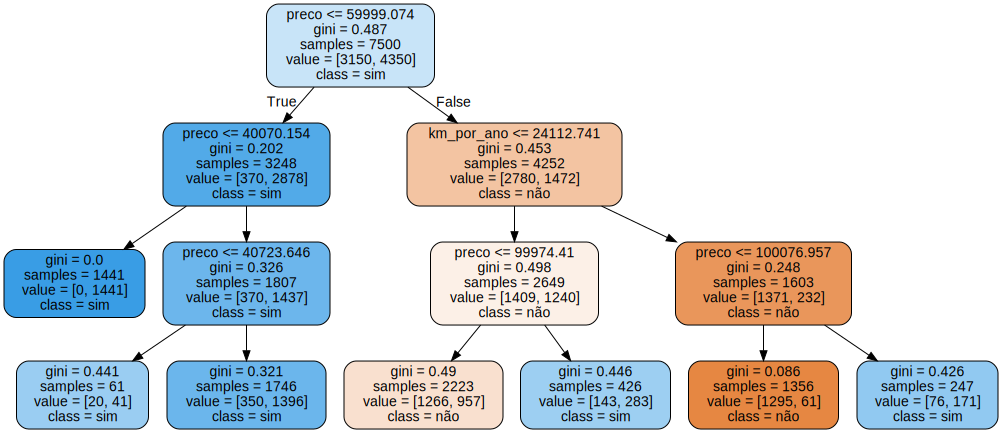

In [22]:
features = x.columns
dot_data = export_graphviz(model, out_file=None, feature_names=features, filled=True, rounded=True, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico